## Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 


### Importing necessary libraries.

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
from scipy.stats import skew
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix,roc_curve,auc,plot_roc_curve
plt.style.use('ggplot')
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

### Importing dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [5]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [7]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [8]:
df.drop('_c39', axis=1, inplace=True)

Dropping column _c39 beacuse it has nothing but null values.

In [10]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [11]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

### Univariate Analysis

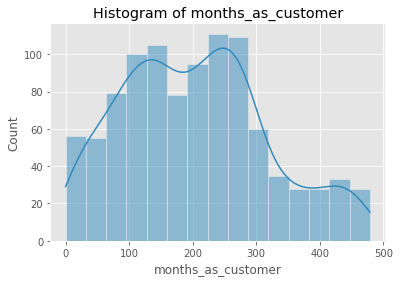

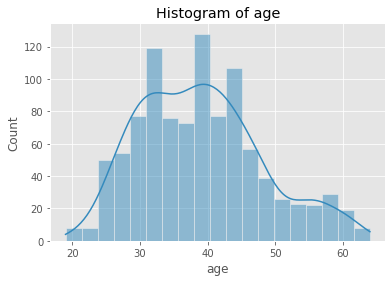

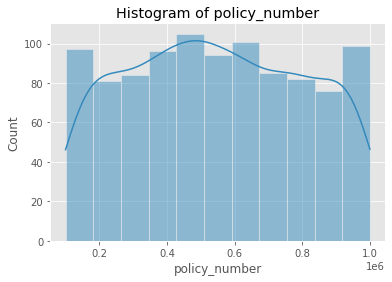

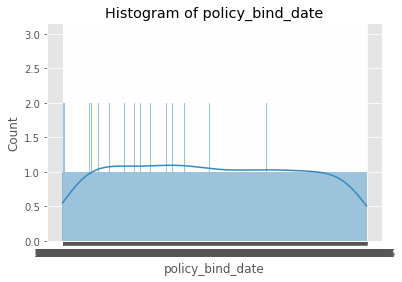

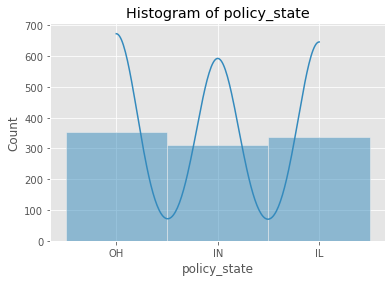

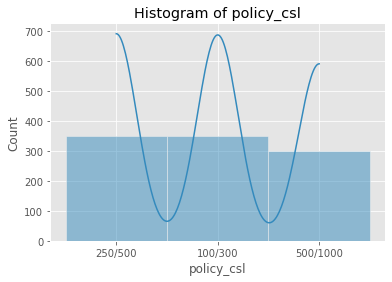

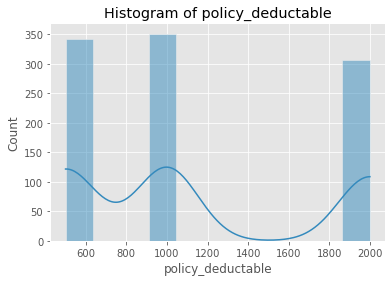

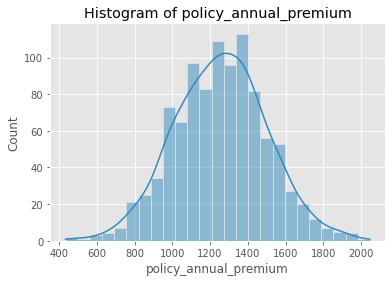

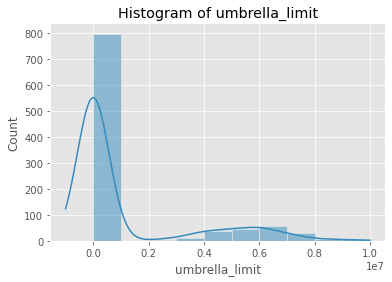

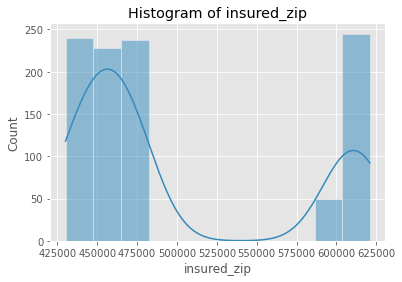

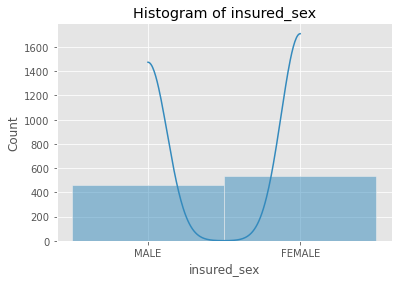

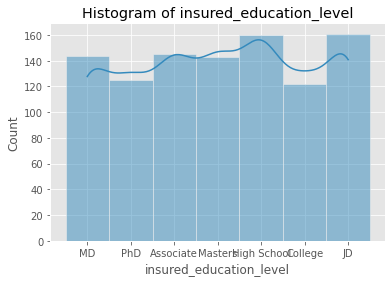

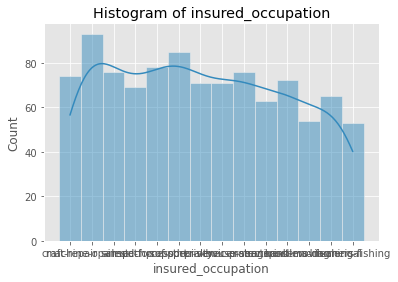

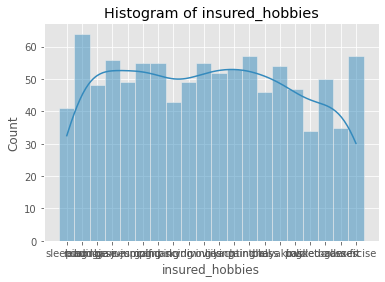

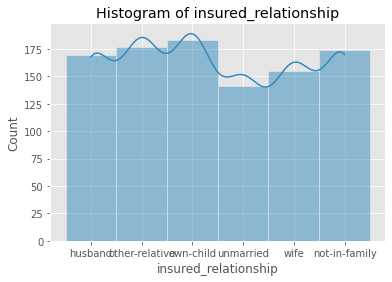

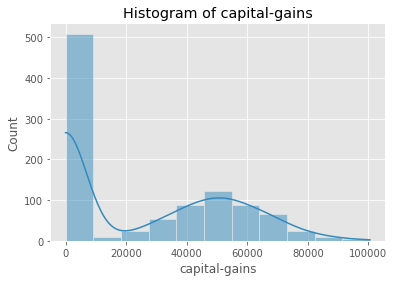

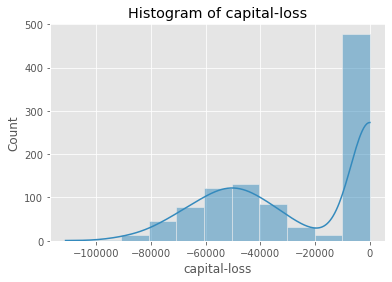

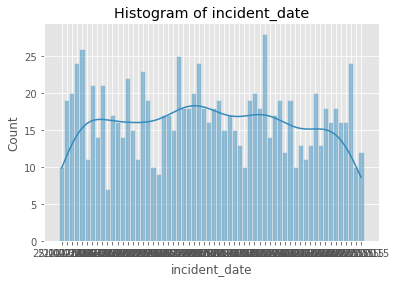

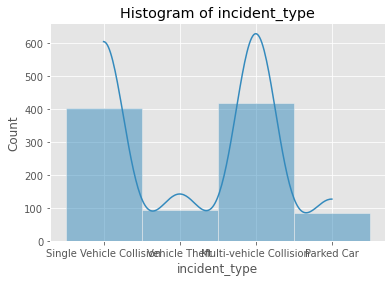

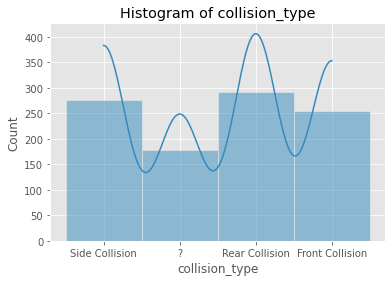

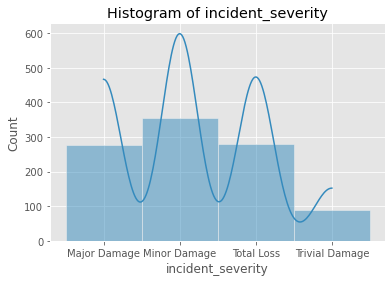

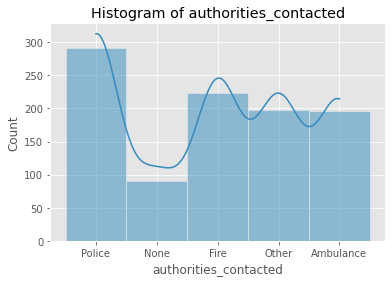

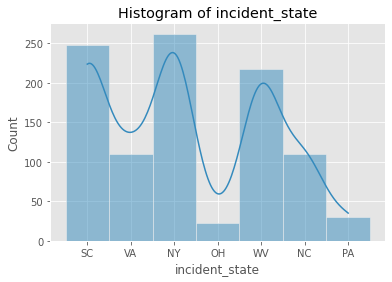

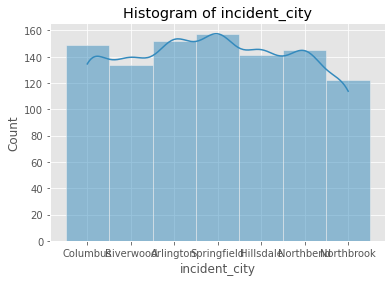

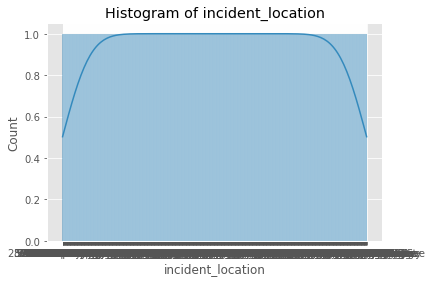

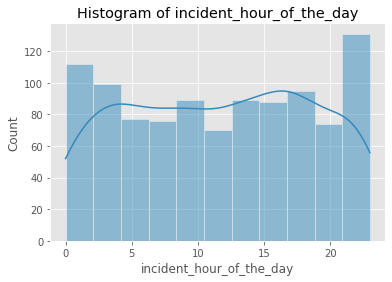

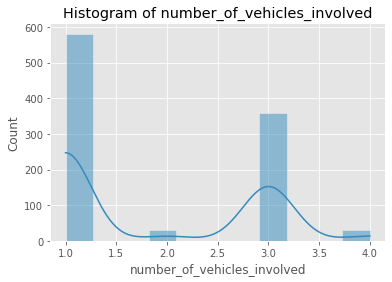

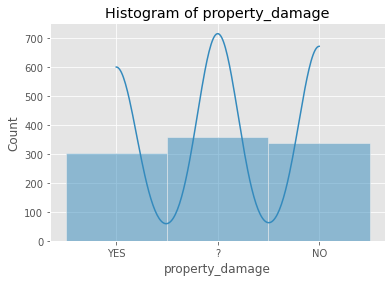

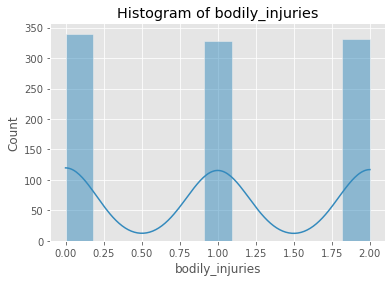

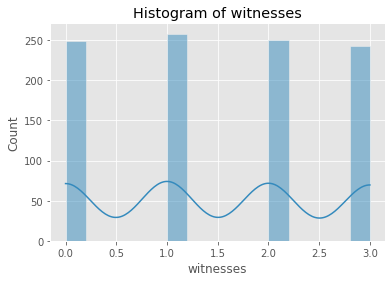

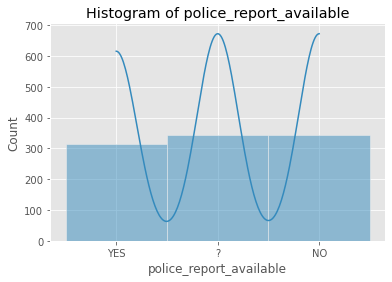

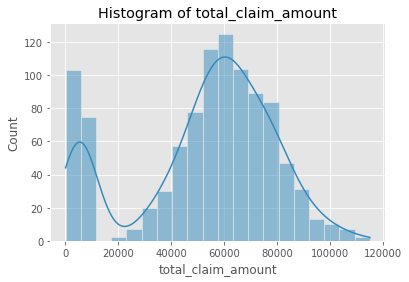

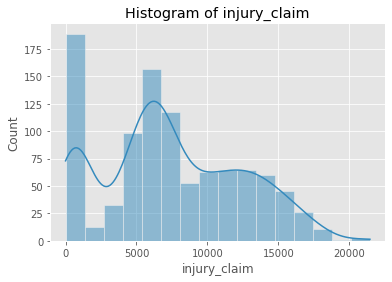

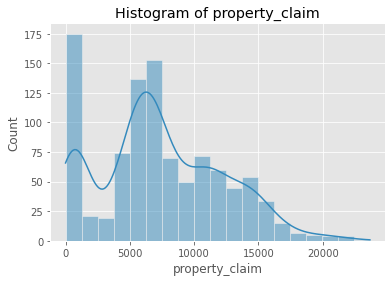

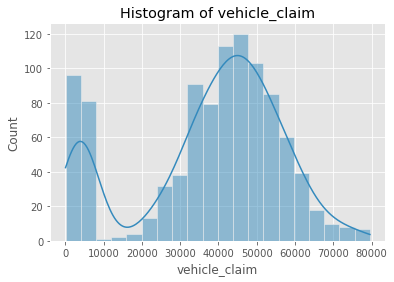

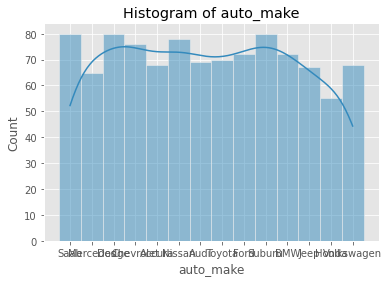

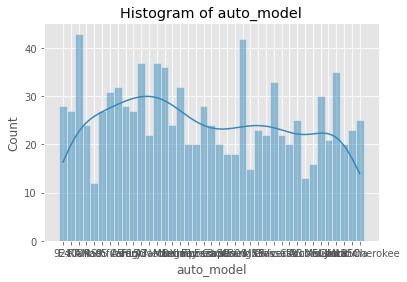

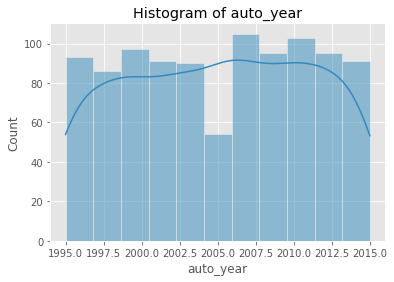

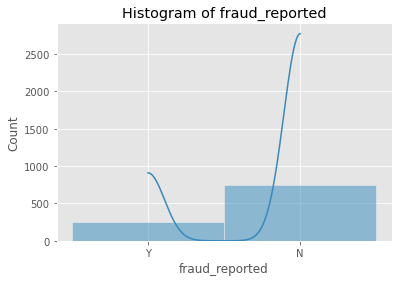

In [12]:
for i in df.columns:
    sns.histplot(df[i], kde=True)
    plt.title(f"Histogram of {i}")
    plt.show()


In [13]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df['policy_bind_date']=le.fit_transform(df['policy_bind_date'])
df['policy_state']=le.fit_transform(df['policy_state'])
df['policy_csl']=le.fit_transform(df['policy_csl'])
df['insured_sex']=le.fit_transform(df['insured_sex'])
df['insured_education_level']=le.fit_transform(df['insured_education_level'])
df['insured_occupation']=le.fit_transform(df['insured_occupation'])
df['insured_hobbies']=le.fit_transform(df['insured_hobbies'])
df['incident_date']=le.fit_transform(df['incident_date'])
df['incident_type']=le.fit_transform(df['incident_type'])
df['collision_type']=le.fit_transform(df['collision_type'])
df['incident_severity']=le.fit_transform(df['incident_severity'])
df['authorities_contacted']=le.fit_transform(df['authorities_contacted'])
df['incident_state']=le.fit_transform(df['incident_state'])
df['incident_city']=le.fit_transform(df['incident_city'])
df['incident_location']=le.fit_transform(df['incident_location'])
df['property_damage']=le.fit_transform(df['property_damage'])
df['police_report_available']=le.fit_transform(df['police_report_available'])
df['auto_make']=le.fit_transform(df['auto_make'])
df['auto_model']=le.fit_transform(df['auto_model'])
df['fraud_reported']=le.fit_transform(df['fraud_reported'])


In [15]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                 int32
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day 

In [16]:
df.drop('insured_relationship', axis=1, inplace=True)

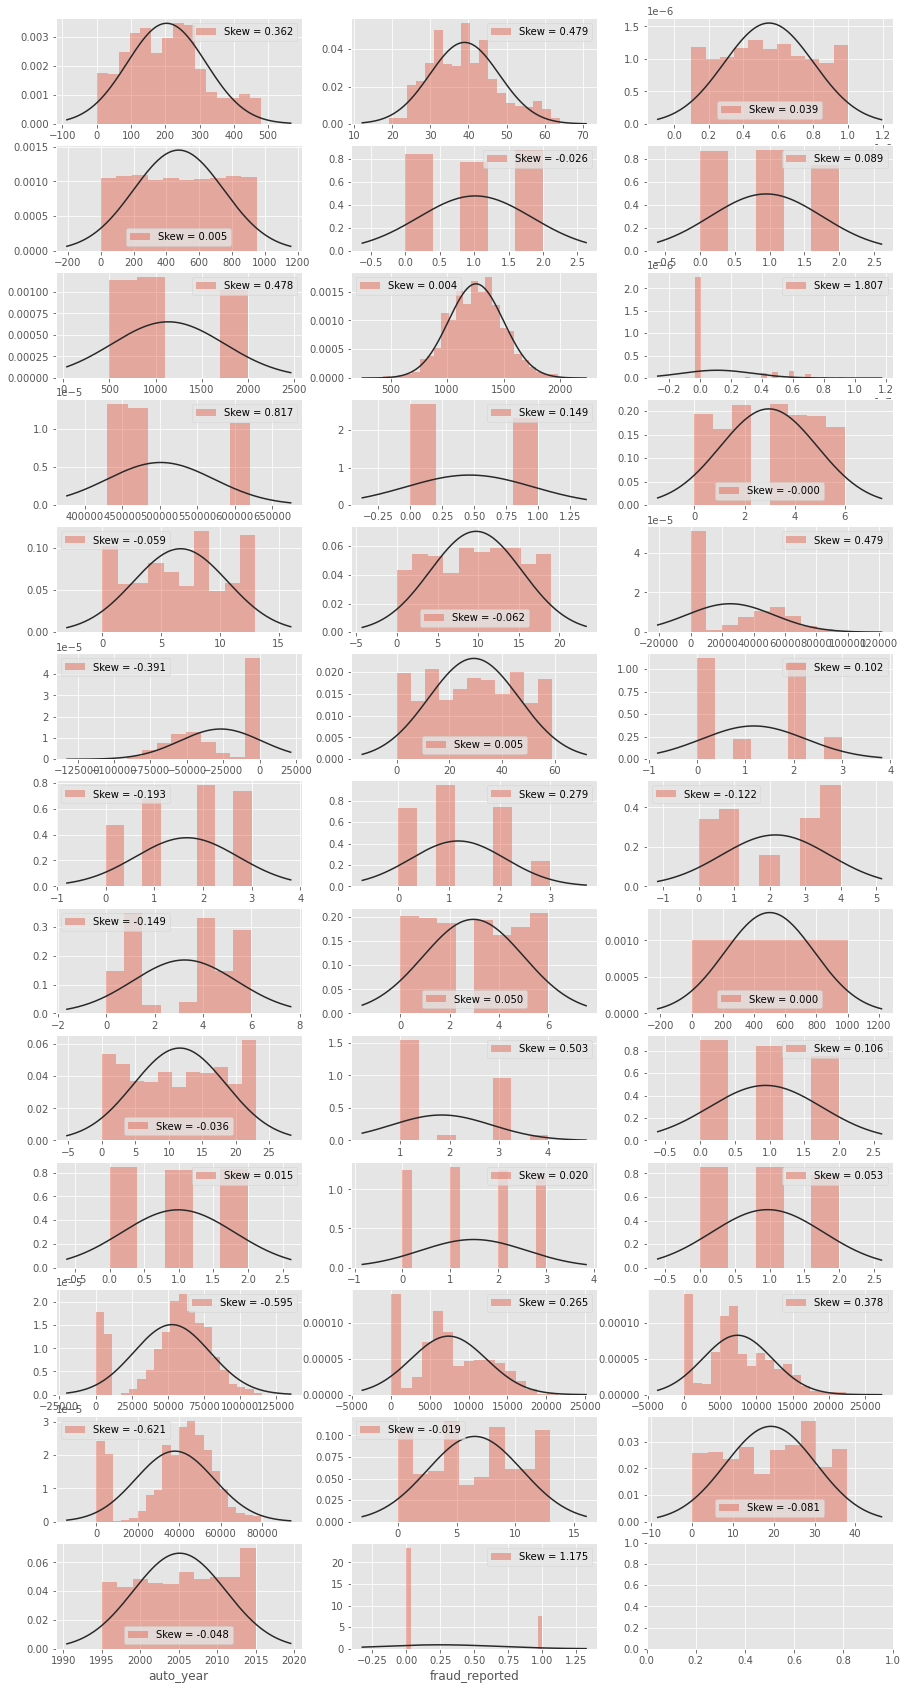

In [17]:
#plotting a histogram of each independent feature for visualization
cols = df.columns
fig,ax = plt.subplots(13,3, figsize=(15, 30))
ax = ax.flatten()
i = 0
for col in cols:
    skew = df[col].skew()
    sns.distplot(df[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))
    ax[i].legend(loc='best')
    i += 1
plt.show()

OH count is more in policy_state.

Female is more.

Both High school and JD are the moredominant in insured_education_level.

Most of the insured are machine-op-inspect.

reading is the hobby of most of the insured followed by paintball and excercise.

most of the insured are own child.

Most of the incident happened is multiple vehicle collission followed by single vehicle collission and least is parked car.

Rear collission is the most in the dataset.

Most of the incident severity is Minor Damage and only a smaller amount of trivial damage occured.

Contacted authority is mostly Police and least with None contacted.

NY is the most incident happened state in the dataset and least amount of incidents in OH.

Springfield is the most incident happened city in the dataset and least amount of incidents in Northbrook.

Most of the data doesnt have any property damage.

In most cases, police report is not available.

Saab, Mercedes and Subaru is the most incident happened vehicles. least incident happened with honda.

RAM and C300 is the most accident marked vehicles. least is RSX. Fraud reported is NO in most cases. genuine cases are more.

### Outliers Treatment

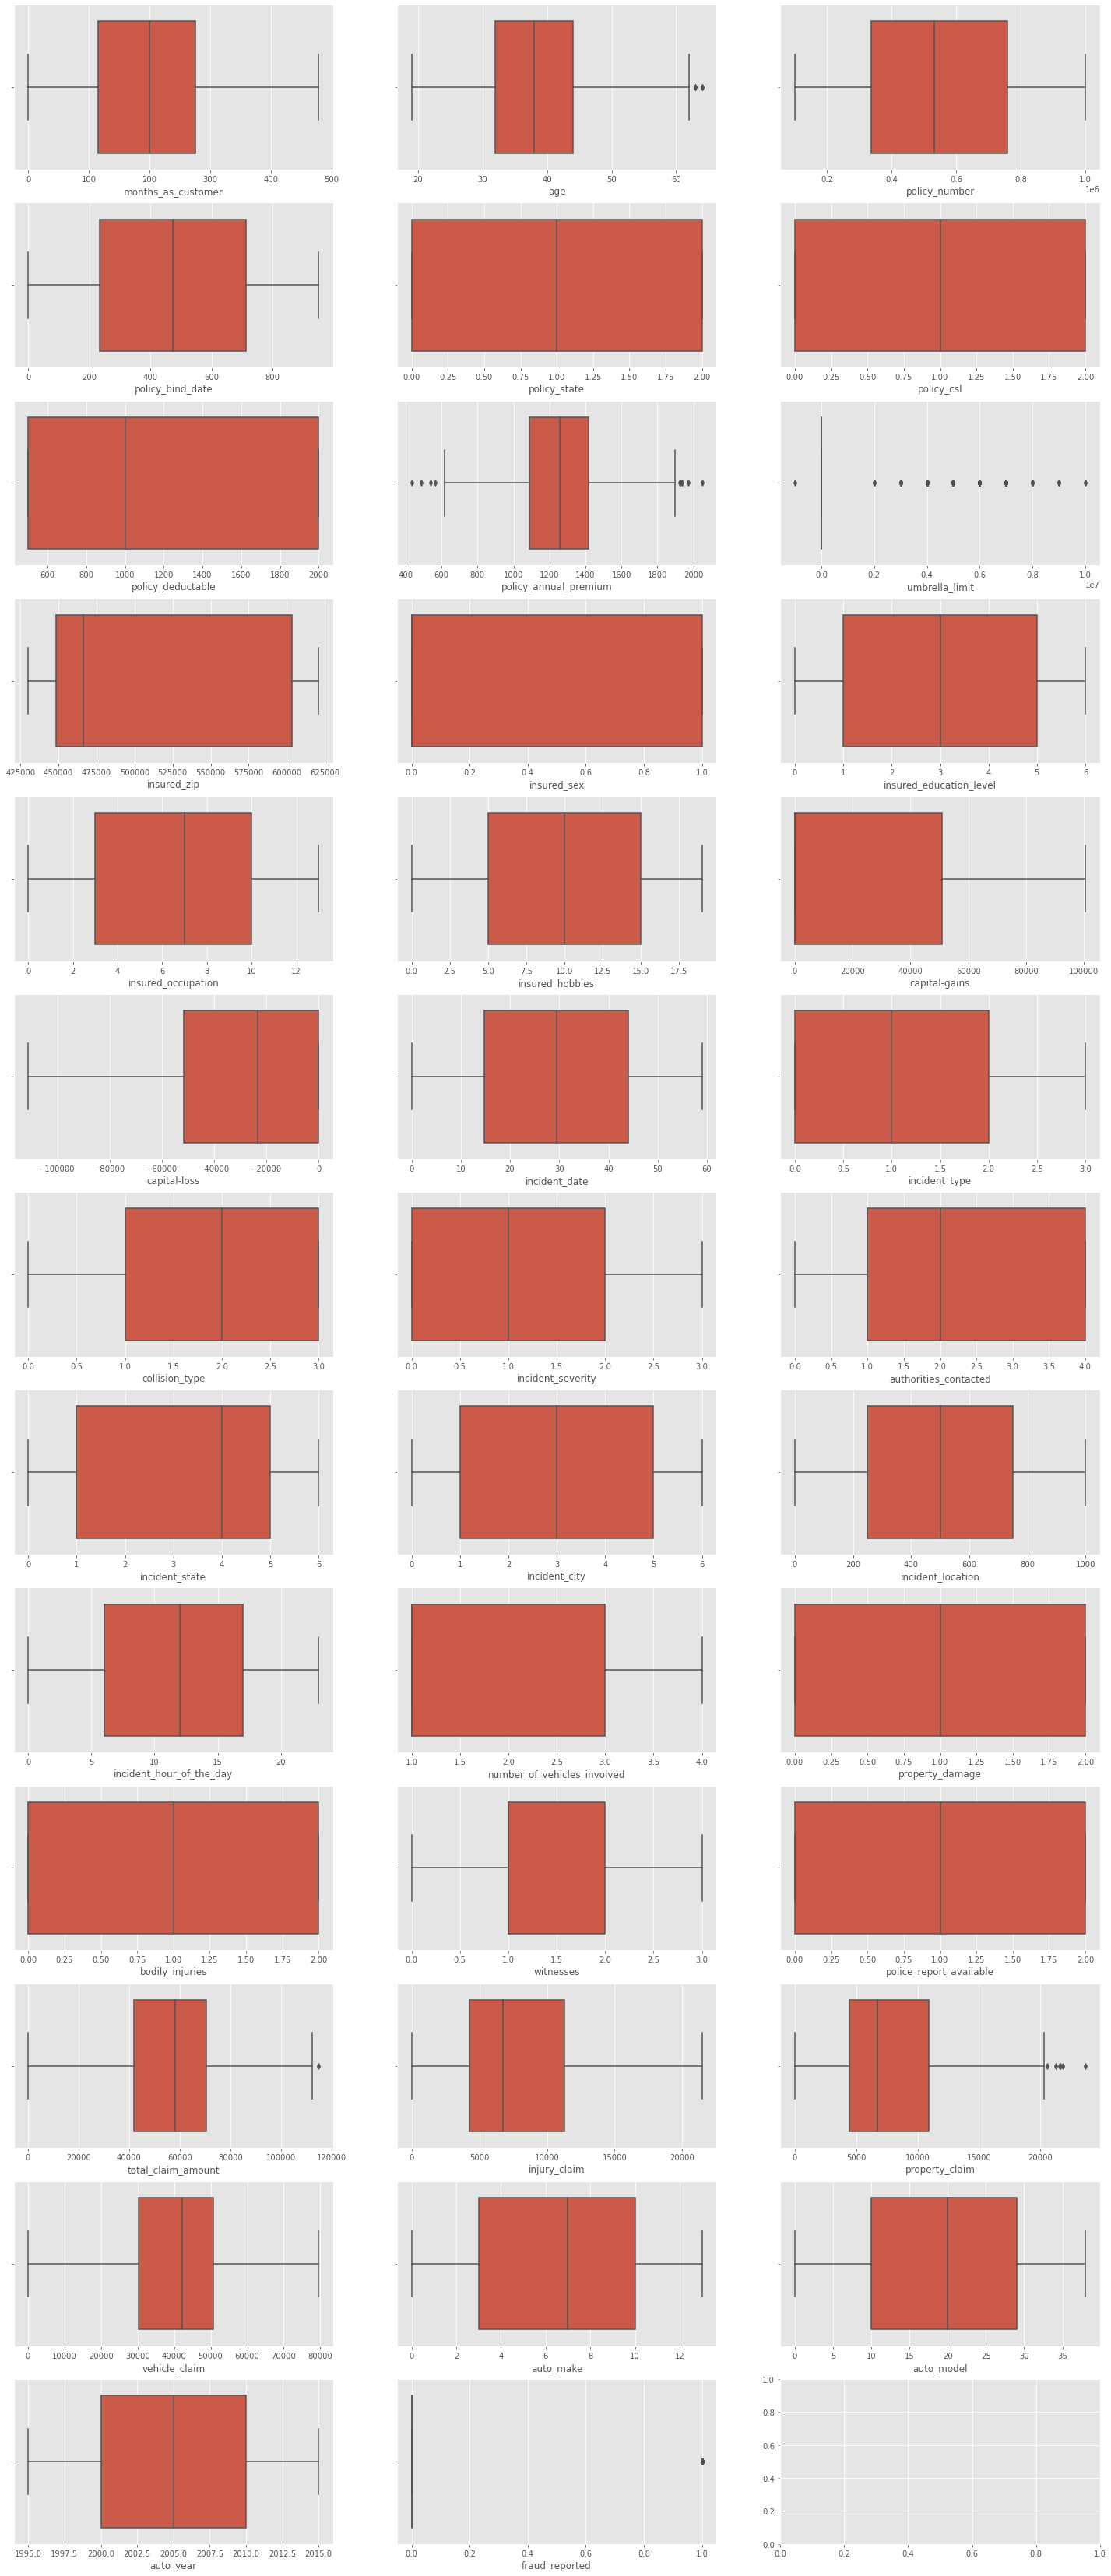

In [18]:
#USING BOXPLOT
fig,ax = plt.subplots(13,3, figsize=(25, 60))
ax = ax.flatten()
i = 0
for col in df:
    sns.boxplot(df[col], ax = ax[i])  
    i += 1
plt.show()

In [19]:
z=np.abs(zscore(df))
dfn=df[(z<3).all(axis=1)]
dfn

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,2,46980,5220,5220,36540,1,5,1998,0


In [20]:
# data loss
data_loss=((df.shape[0]-dfn.shape[0])/df.shape[0])*100
print(f'data loss is : {data_loss:0.1f}%')

data loss is : 2.0%


### Bivariate Analysis

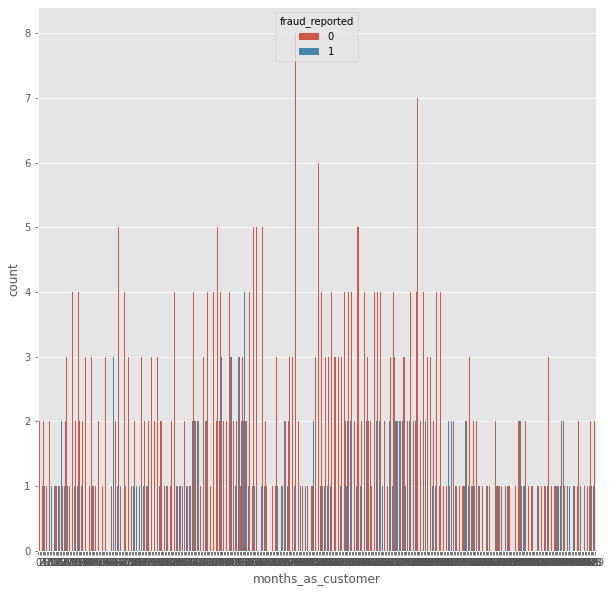

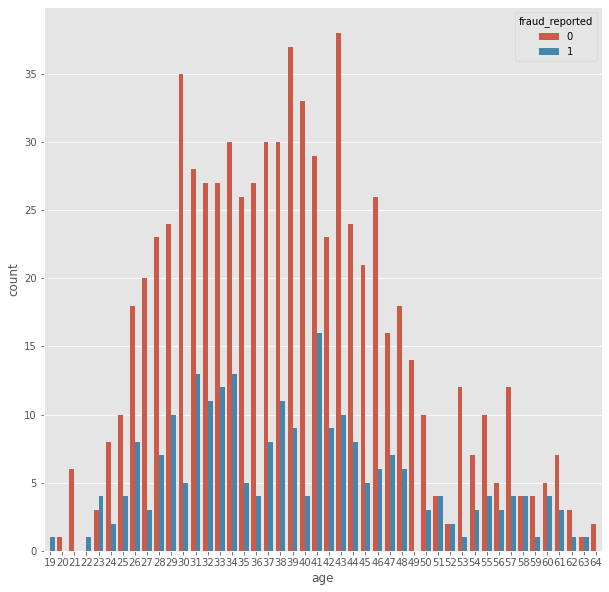

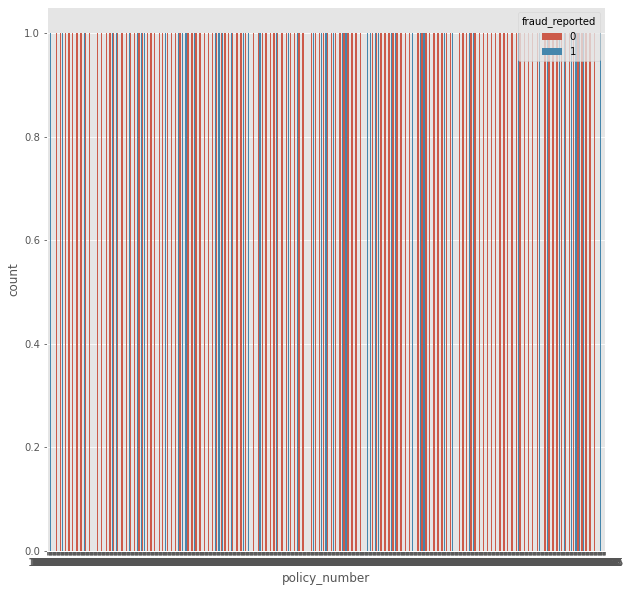

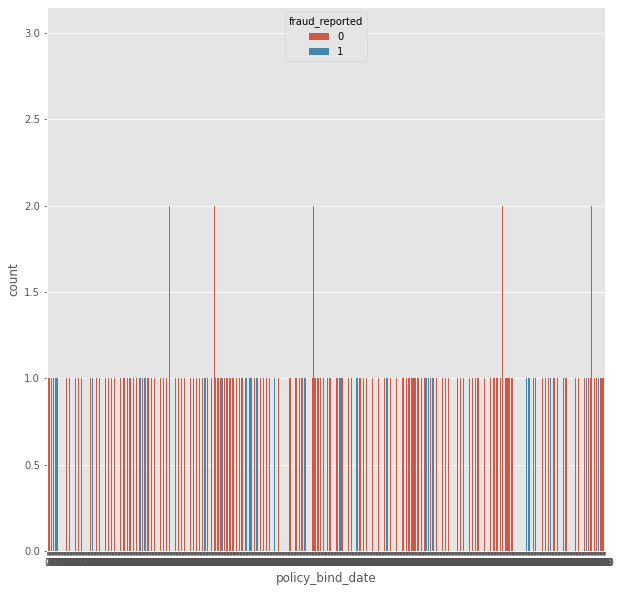

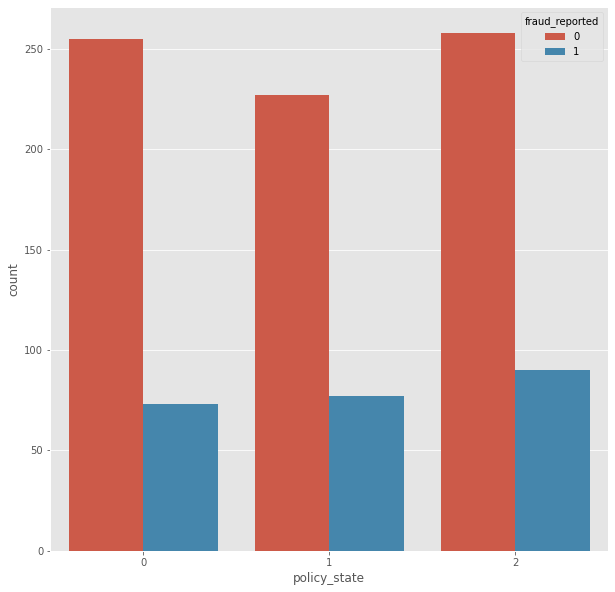

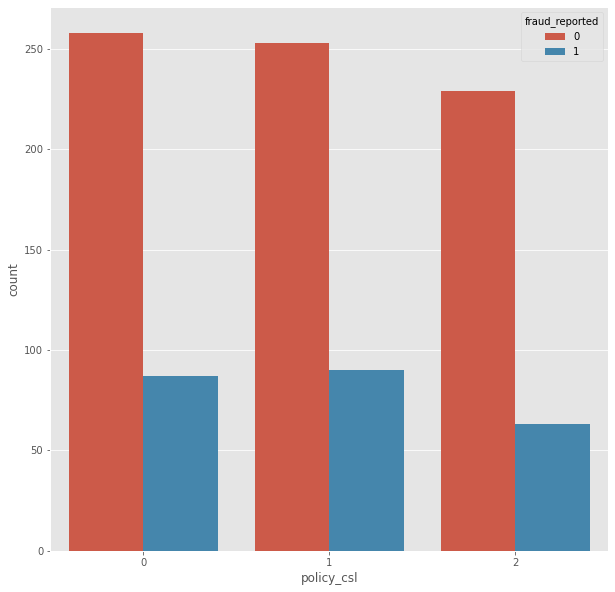

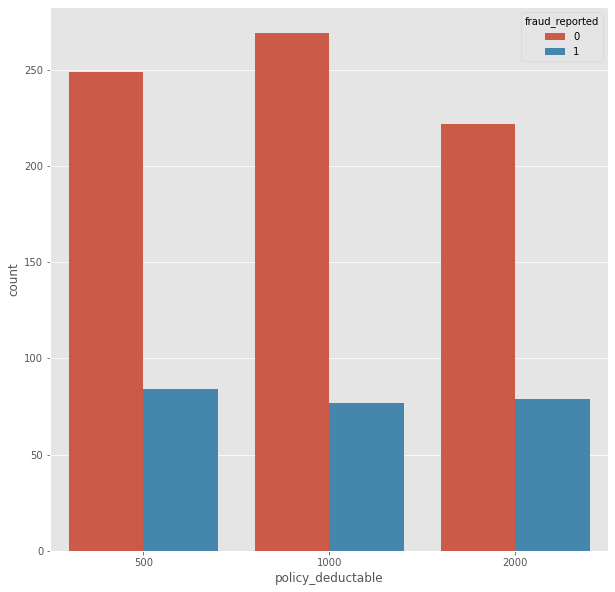

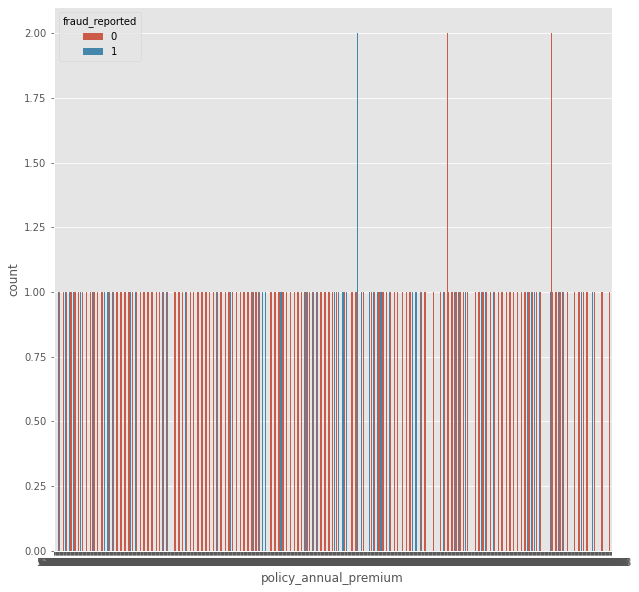

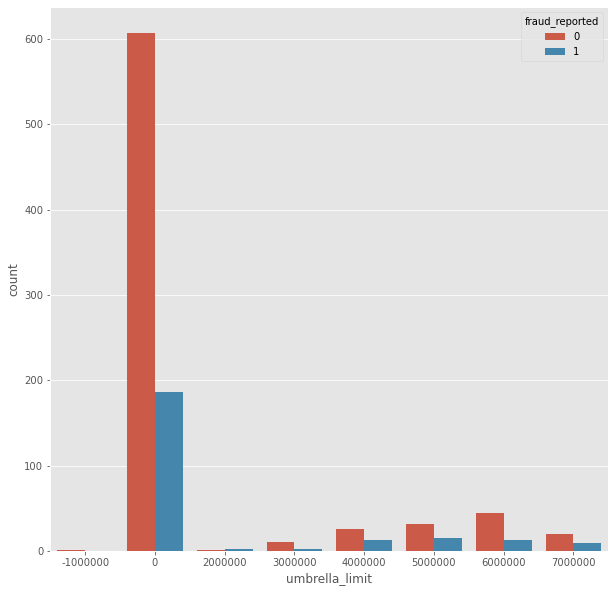

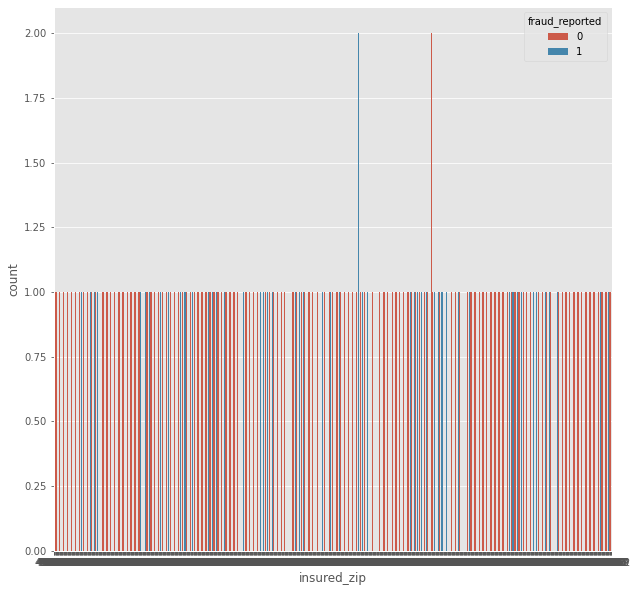

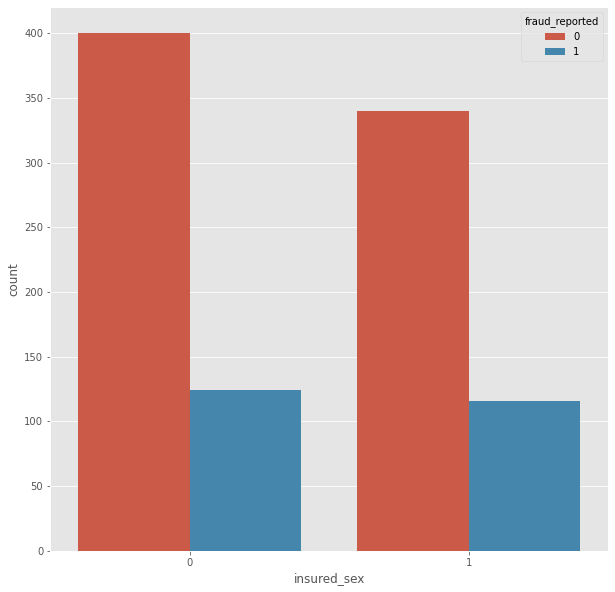

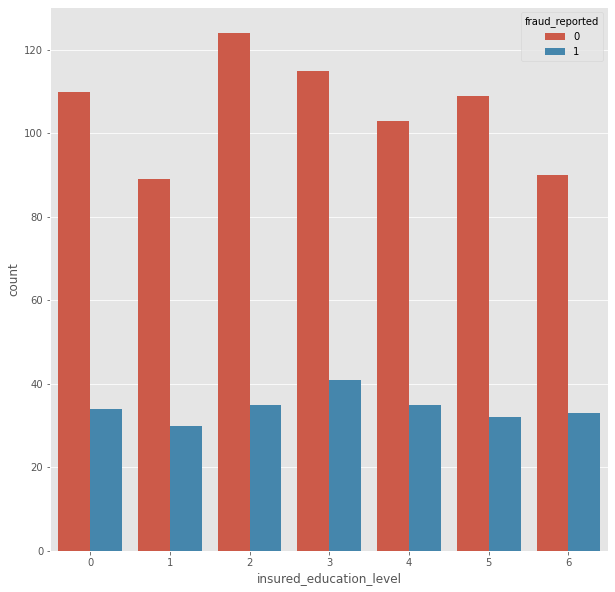

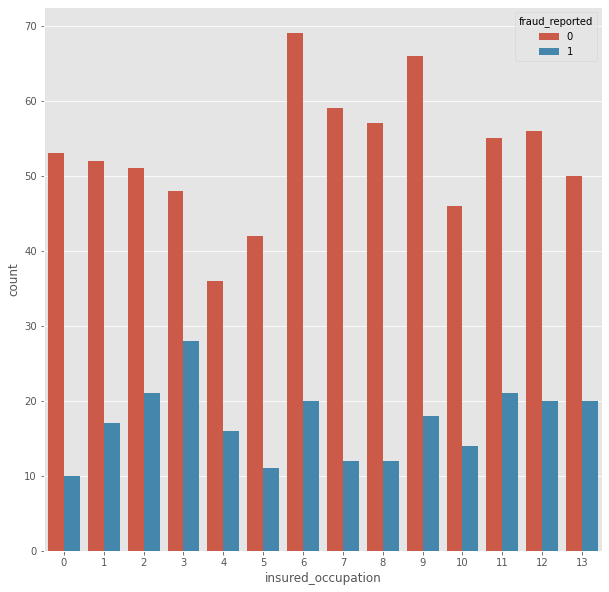

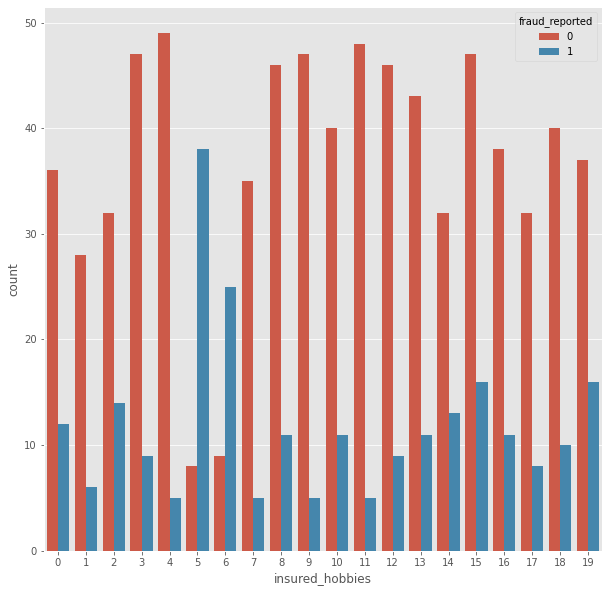

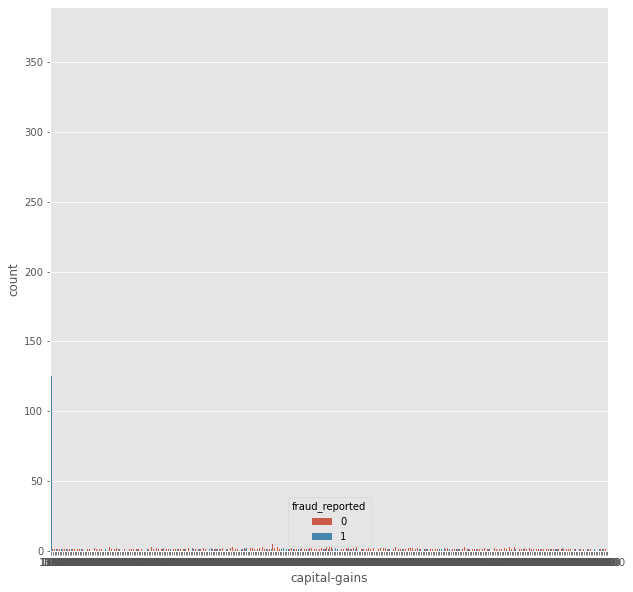

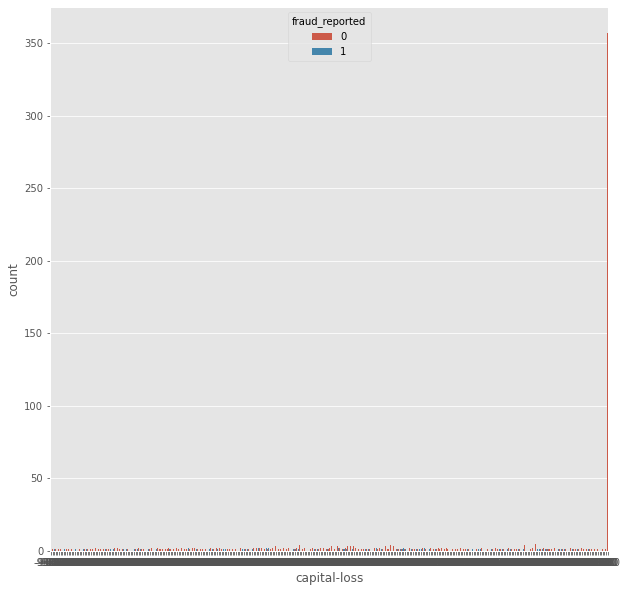

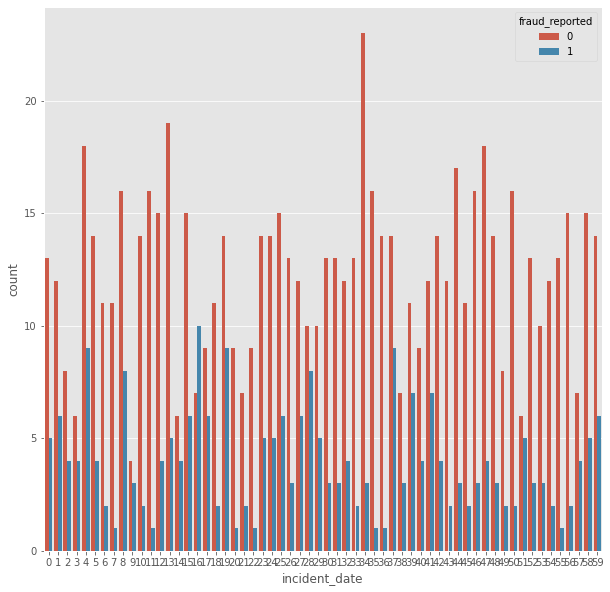

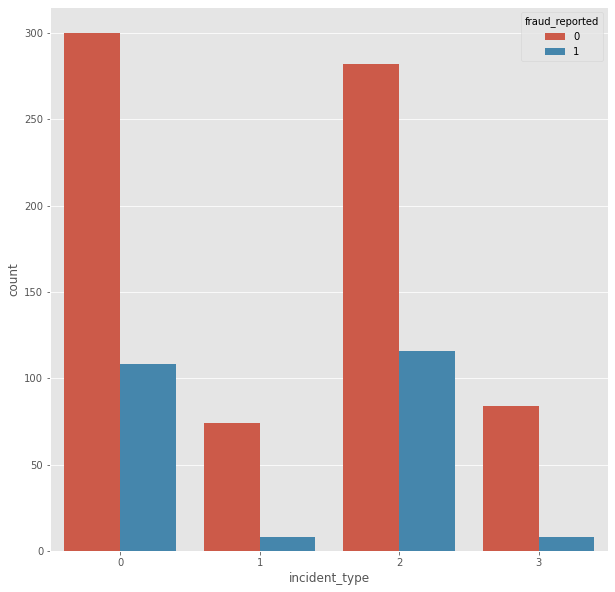

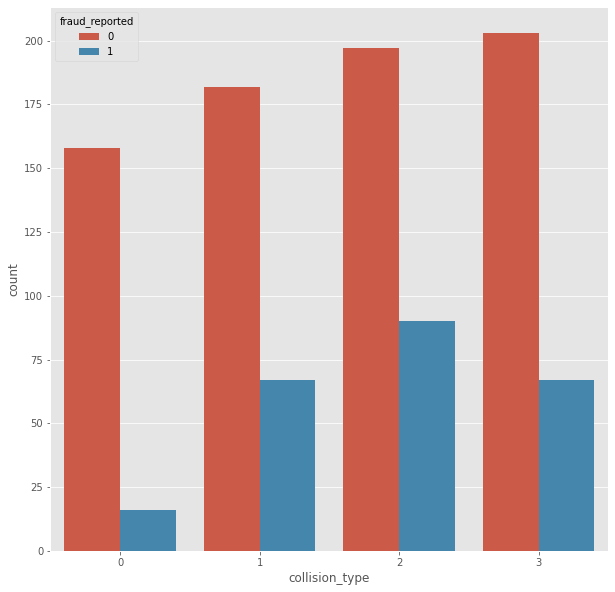

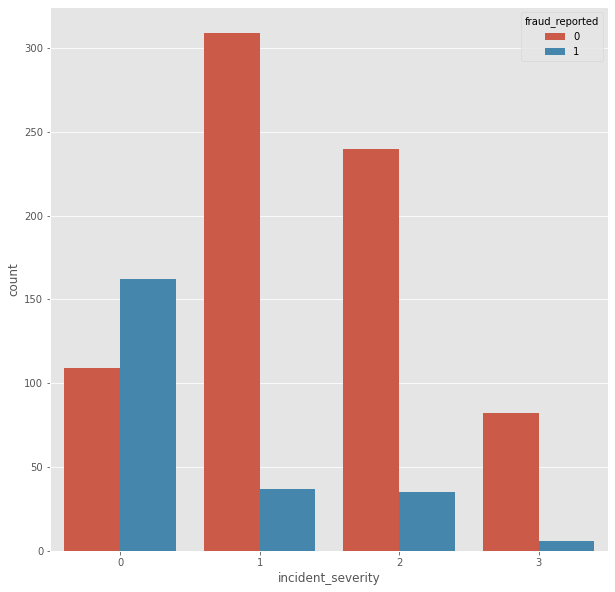

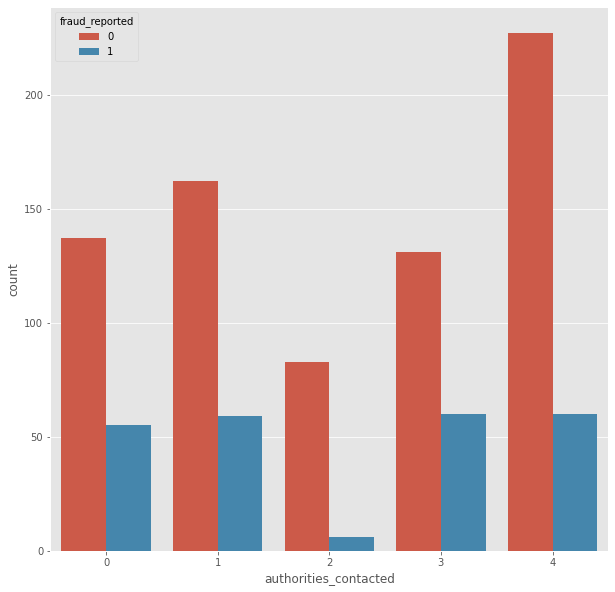

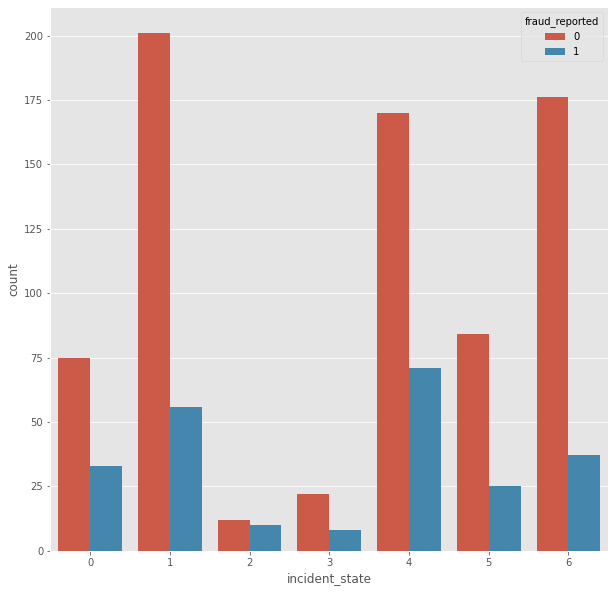

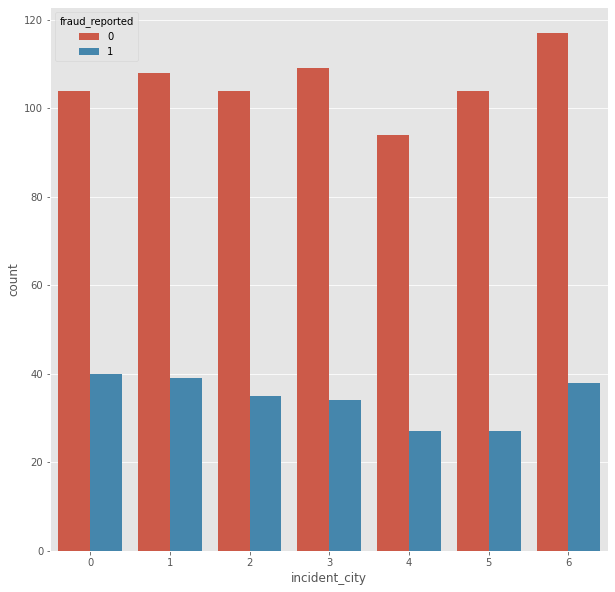

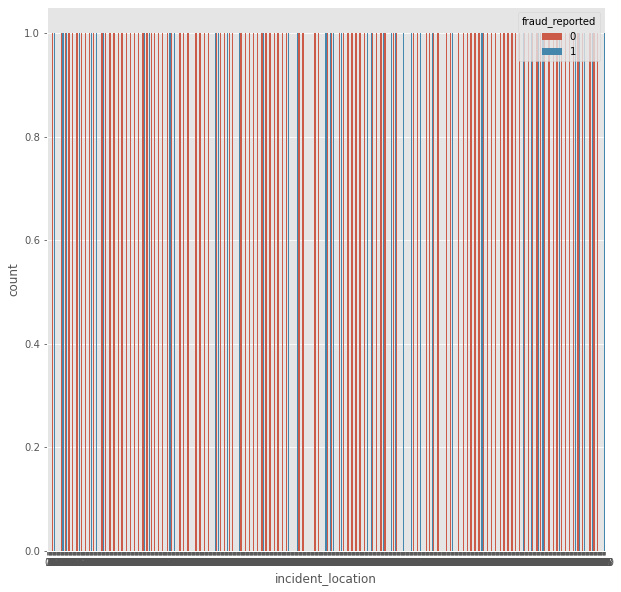

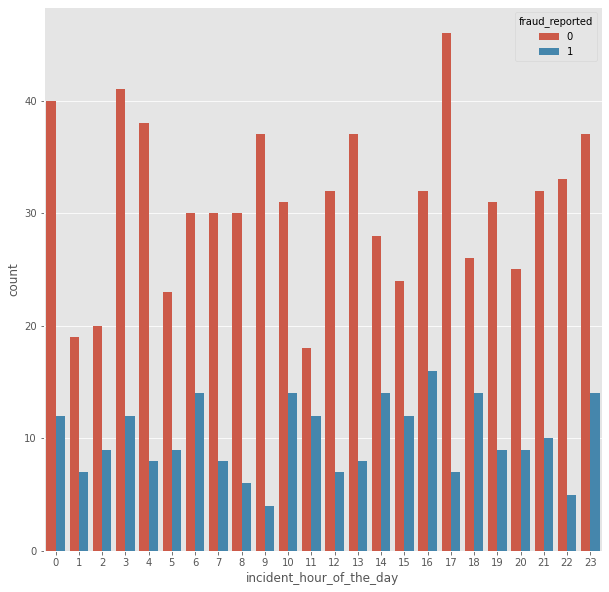

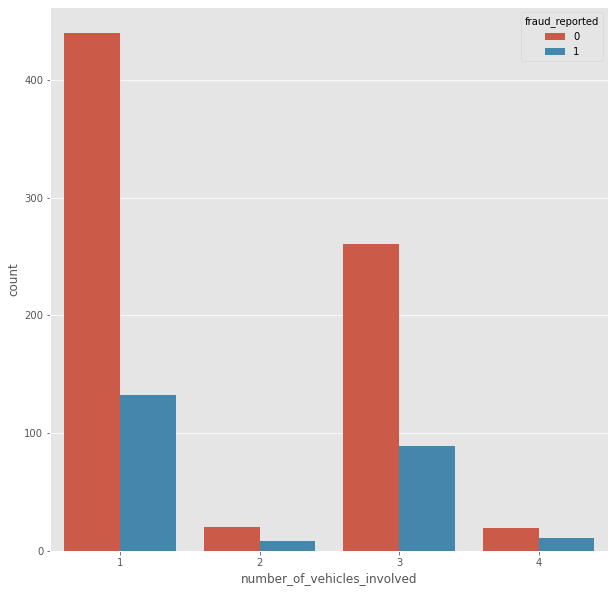

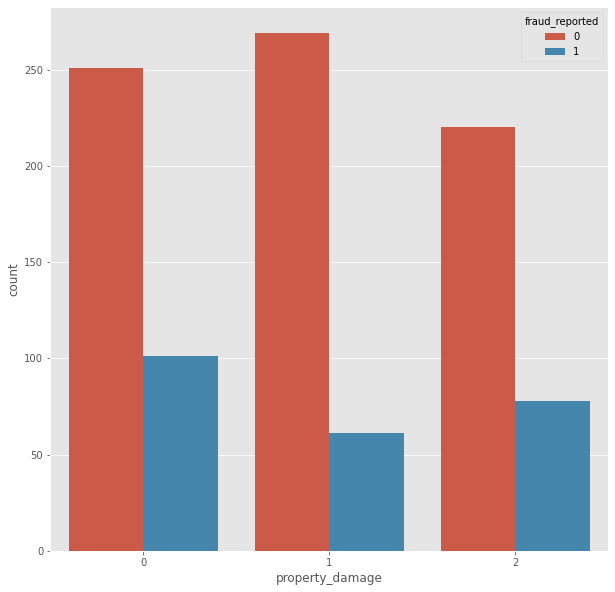

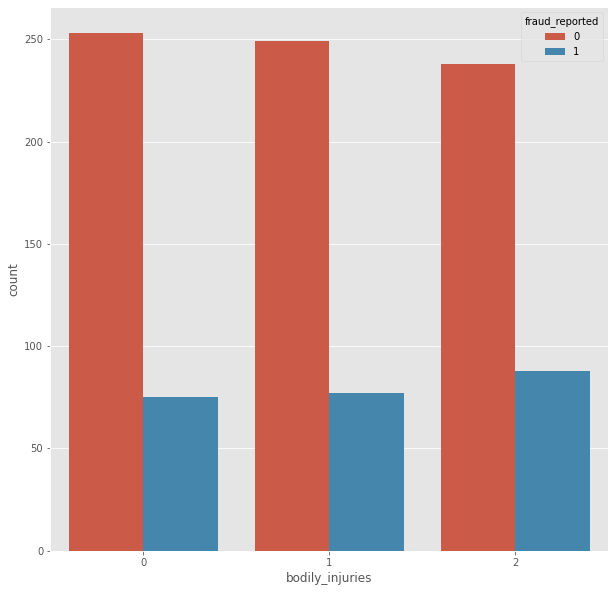

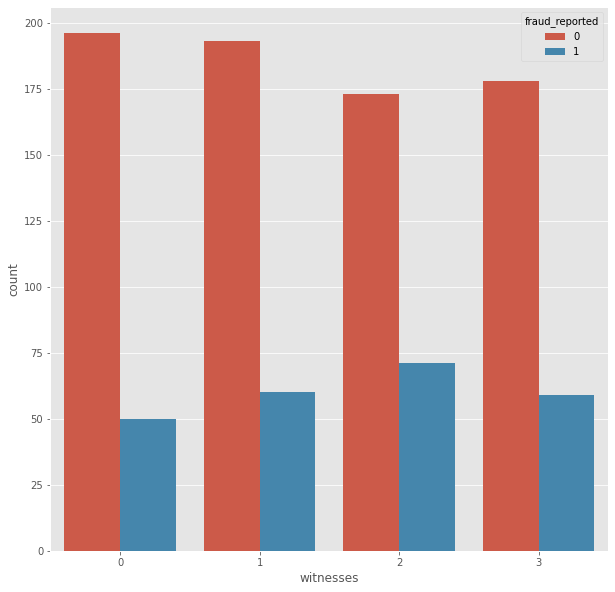

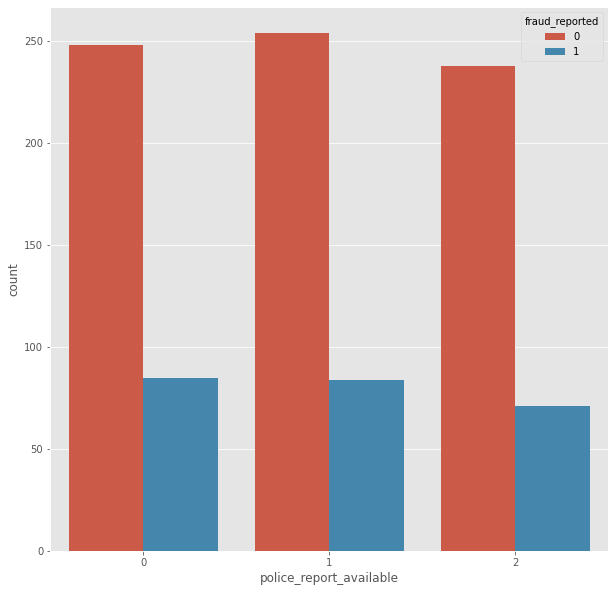

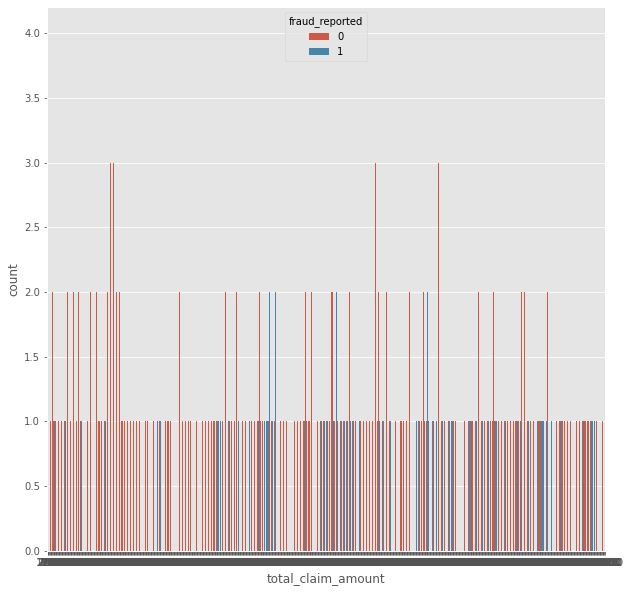

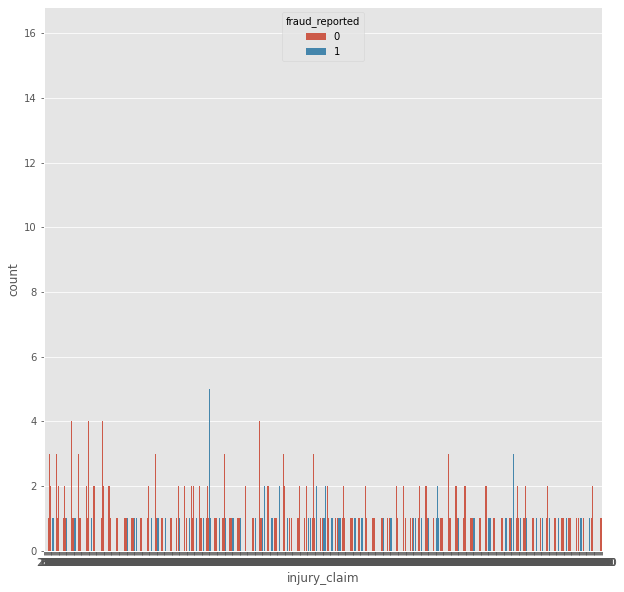

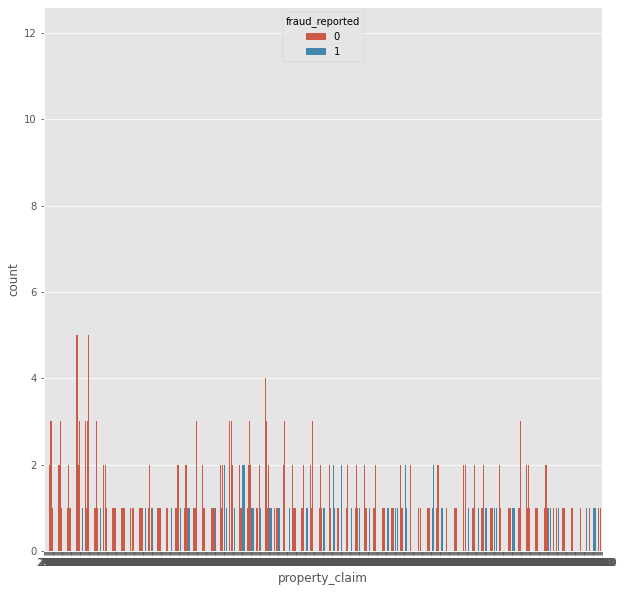

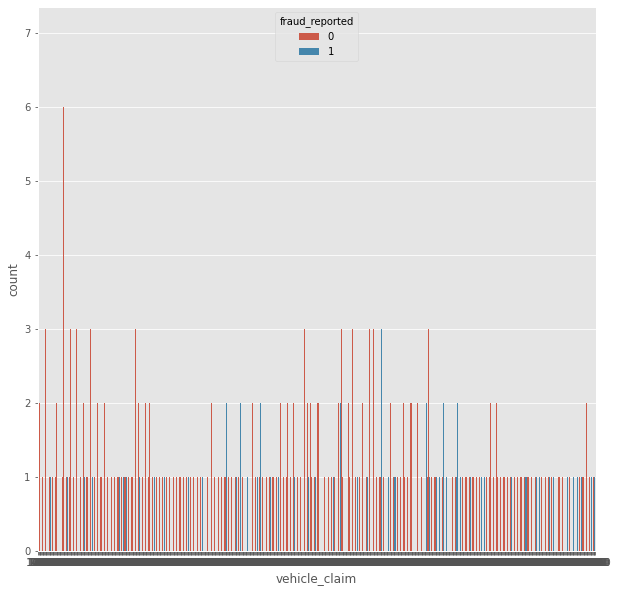

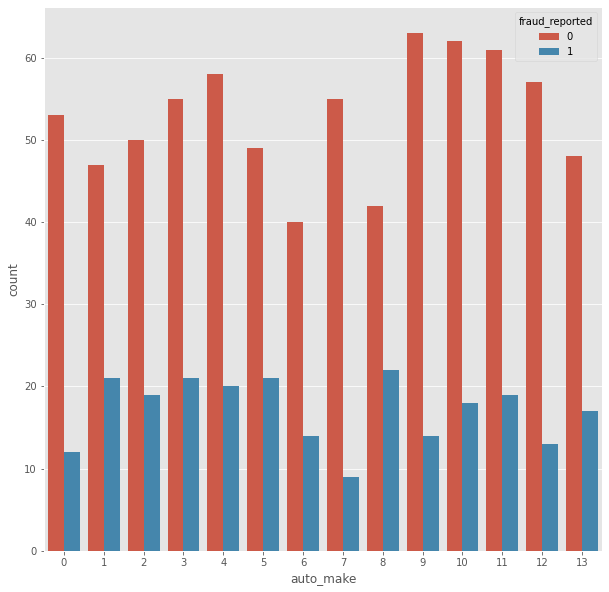

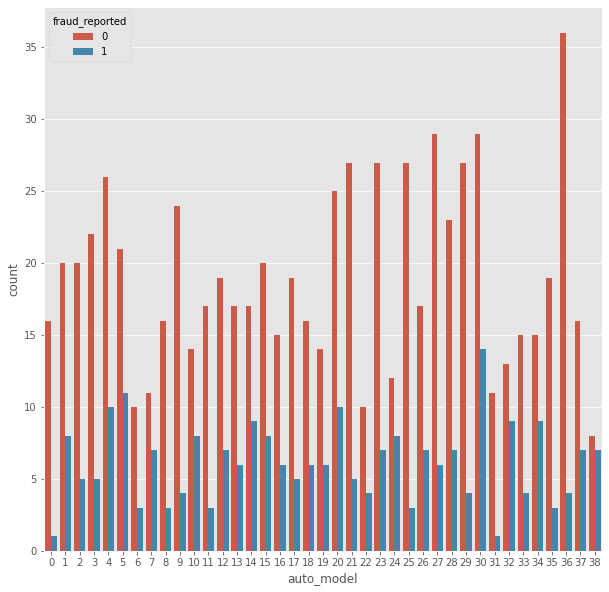

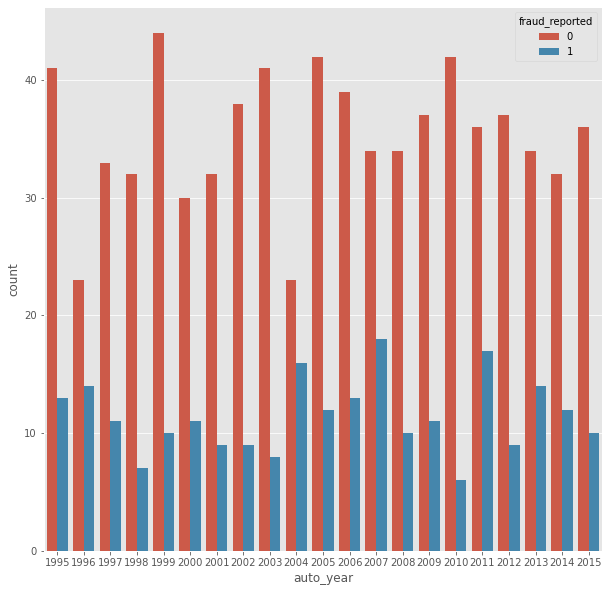

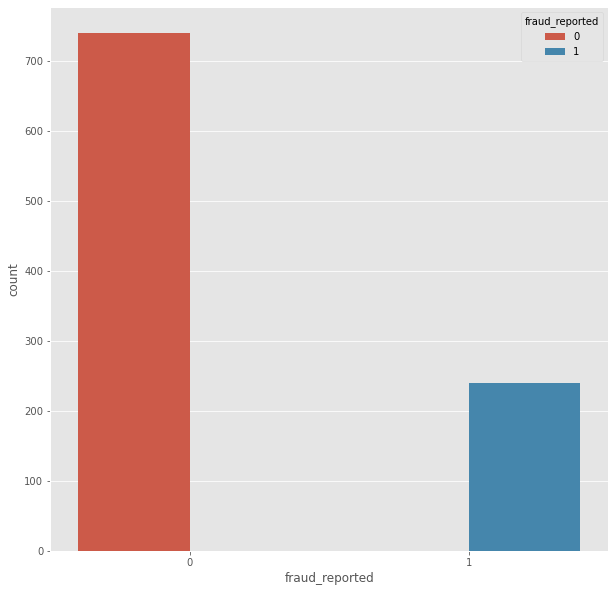

In [21]:
for i, x in enumerate(dfn):
    plt.figure(i, figsize=(10, 10))
    sns.countplot(data=dfn,hue='fraud_reported',x=x)

### Scaling of Independent features

In [22]:
X = dfn.iloc[:, :-1]
y = dfn.iloc[:, -1]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

In [23]:
X

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,1,2,2,71610,6510,13020,52080,10,1,2004
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,0,5070,780,780,3510,8,12,2007
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,2,3,1,34650,7700,3850,23100,4,30,2007
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,1,2,1,63400,6340,6340,50720,3,34,2014
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,0,1,1,6500,1300,650,4550,0,31,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,0,1,0,87200,17440,8720,61040,6,6,2006
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,2,3,0,108480,18080,18080,72320,13,28,2015
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,2,3,2,67500,7500,7500,52500,11,19,1996
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,0,1,2,46980,5220,5220,36540,1,5,1998


In [24]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 980, dtype: int32

### Random Forrest Classifier

At random state 84, The training accuracy is : -0.8271604938271605


In [54]:
#Finding the best random state

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state =i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train, y_train)
    pred = rfc.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.826530612244898  on Random_state  9


In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = RS)

rfc.fit(x_train,y_train)
pred_train=rfc.predict(x_train)
pred_test=rfc.predict(x_test)
score_test=roc_auc_score(y_test,pred_test)
score_train=roc_auc_score(y_train,pred_train)
score_acc=accuracy_score(y_test,pred_test)
print('Auc test: ',score_acc)
print('Roc_Auc train: ',score_train)
print('Roc_Auc test: ',score_test)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(rfc,x,y,cv=10).mean())

Auc test:  0.8367346938775511
Roc_Auc train:  1.0
Roc_Auc test:  0.7173878835562549
Confusion Matrix:  
 [[143  12]
 [ 20  21]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       155
           1       0.64      0.51      0.57        41

    accuracy                           0.84       196
   macro avg       0.76      0.72      0.73       196
weighted avg       0.83      0.84      0.83       196

CV  :  0.7581632653061225


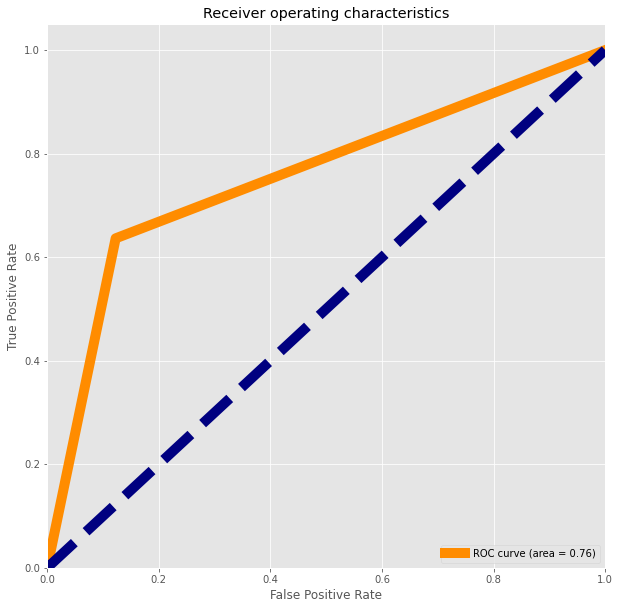

In [56]:
# ROC curve
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [26]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=78)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(686, 37) (686,)
(294, 37) (294,)


### Decision Tree

In [28]:
#Finding the best random state:

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state =i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred = dtc.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8826530612244898  on Random_state  13


In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = RS)

dtc.fit(x_train,y_train)
pred_train=dtc.predict(x_train)
pred_test=dtc.predict(x_test)
score_train=roc_auc_score(y_train,pred_train)
score_test=roc_auc_score(y_test,pred_test)
print('Roc_Auc Score_train: ',score_train)
print('Roc_Auc Score_test: ',score_test)
print('Confusion Matrix: ' ,'\n','\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(dtc,x,y,cv=10).mean())

Roc_Auc Score_train:  1.0
Roc_Auc Score_test:  0.798695652173913
Confusion Matrix:  
 
 [[132  18]
 [ 13  33]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       150
           1       0.65      0.72      0.68        46

    accuracy                           0.84       196
   macro avg       0.78      0.80      0.79       196
weighted avg       0.85      0.84      0.84       196

CV  :  0.7887755102040817


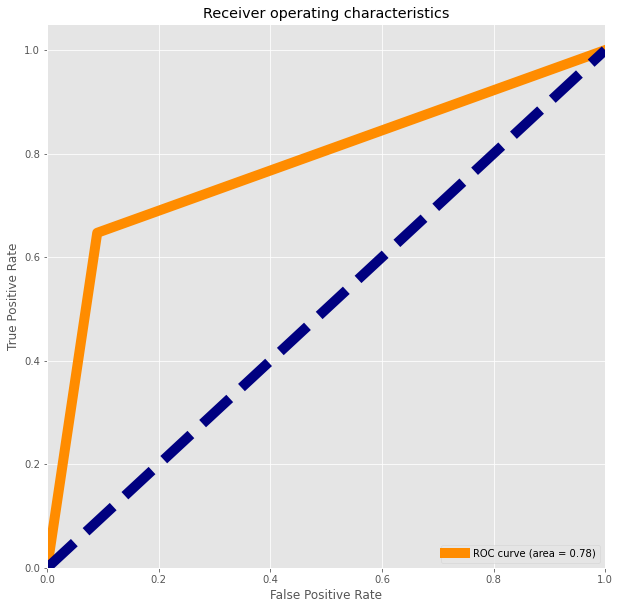

In [30]:
# ROC curve
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()


### SVM

In [31]:
#Finding the best random state:

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state =i)
    svc=SVC()
    svc.fit(x_train, y_train)
    pred = svc.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.826530612244898  on Random_state  68


In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = RS)

svc.fit(x_train,y_train)
pred_train=svc.predict(x_train)
pred_test=svc.predict(x_test)
score_test=roc_auc_score(y_test,pred_test)
score_train=roc_auc_score(y_train,pred_train)
print('Roc_Auc train: ',score_train)
print('Roc_Auc test: ',score_test)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(svc,x,y,cv=10).mean())

Roc_Auc train:  0.821256038647343
Roc_Auc test:  0.5573526677821157
Confusion Matrix:  
 [[157   6]
 [ 28   5]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       163
           1       0.45      0.15      0.23        33

    accuracy                           0.83       196
   macro avg       0.65      0.56      0.56       196
weighted avg       0.78      0.83      0.79       196

CV  :  0.7510204081632652


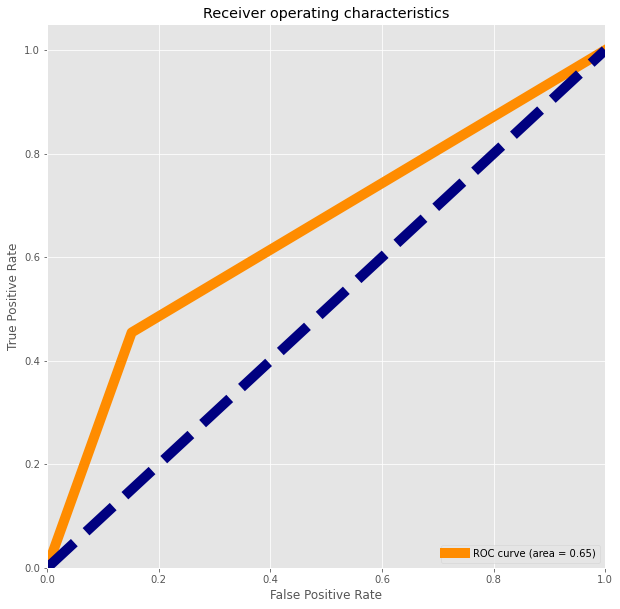

In [33]:
# ROC curve
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### KNN

In [39]:
#Finding the best random state:

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state =i)
    score_acc=accuracy_score(y_test,pred_test)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8010204081632653  on Random_state  51


In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = RS)

knn.fit(x_train,y_train)
pred_train=knn.predict(x_train)
pred_test=knn.predict(x_test)
score_test=roc_auc_score(y_test,pred_test)
score_train=roc_auc_score(y_train,pred_train)
print('Roc_Auc train: ',score_train)
print('Roc_Auc test: ',score_test)
print('Auccuracy test: ',score_acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(knn,x,y,cv=10).mean())

Roc_Auc train:  0.642645707869756
Roc_Auc test:  0.5767821452365091
Auccuracy test:  0.6836734693877551
Confusion Matrix:  
 [[149   9]
 [ 30   8]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       158
           1       0.47      0.21      0.29        38

    accuracy                           0.80       196
   macro avg       0.65      0.58      0.59       196
weighted avg       0.76      0.80      0.77       196

CV  :  0.7224489795918367


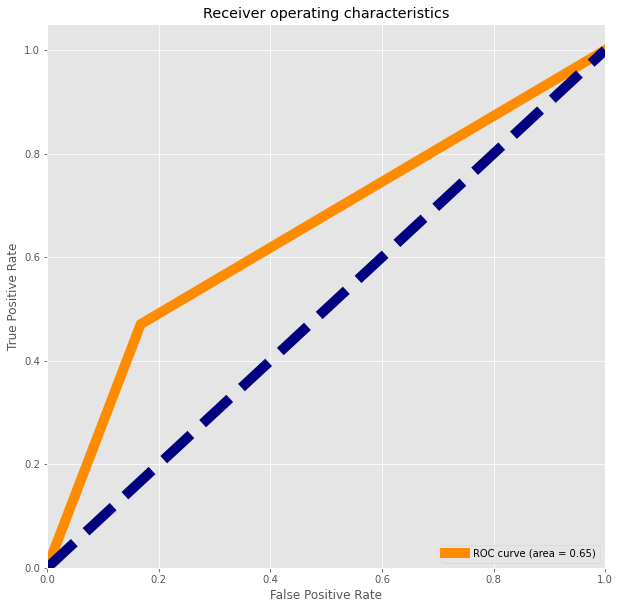

In [41]:
# ROC curve
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()


### GBC

In [45]:
#Finding the best random state

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state =i)
    gbc=GradientBoostingClassifier()
    gbc.fit(x_train, y_train)
    pred = gbc.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8877551020408163  on Random_state  9


In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = RS)


gbc.fit(x_train,y_train)
pred_test=gbc.predict(x_test)
pred_train=gbc.predict(x_train)
score_test=roc_auc_score(y_test,pred_test)
score_train=roc_auc_score(y_train,pred_train)
score_acc=accuracy_score(y_test,pred_test)
print('Accuracy test: ',score_acc)
print('Roc_Auc train: ',score_train)
print('Roc_Auc test: ',score_test)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(gbc,x,y,cv=10).mean())

Accuracy test:  0.8877551020408163
Roc_Auc train:  0.9537645492419361
Roc_Auc test:  0.83933910306845
Confusion Matrix:  
 [[143  12]
 [ 10  31]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       155
           1       0.72      0.76      0.74        41

    accuracy                           0.89       196
   macro avg       0.83      0.84      0.83       196
weighted avg       0.89      0.89      0.89       196

CV  :  0.8255102040816327


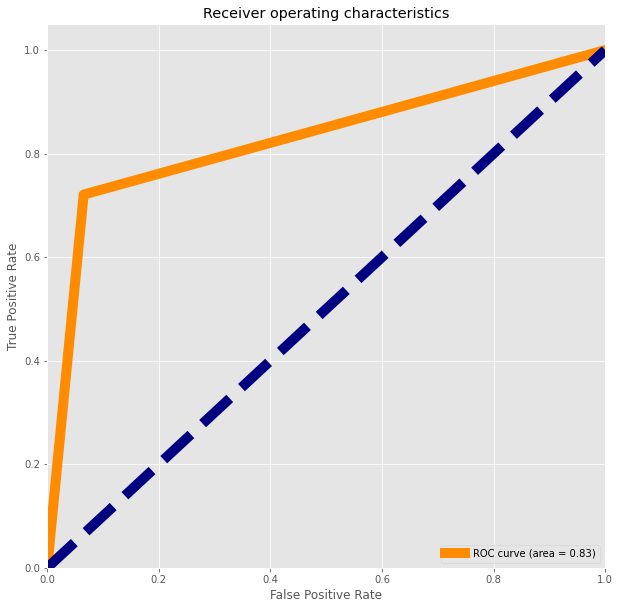

In [47]:
# ROC curve
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

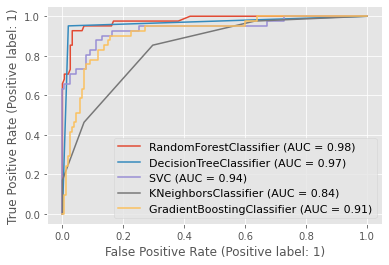

In [50]:
# Plotting AUC-ROC Curve for all the models used here 

disp = plot_roc_curve(rfc,x_test,y_test)
plot_roc_curve(dtc,x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gbc, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

Chose RandomeForrestClassifier to be my Model as it have (AUC: 98%)

In [61]:
#Saving the model using .pkl
import joblib
joblib.dump(rfc,"Insurance_Fraud.pkl")

['Insurance_Fraud.pkl']

<AxesSubplot:>

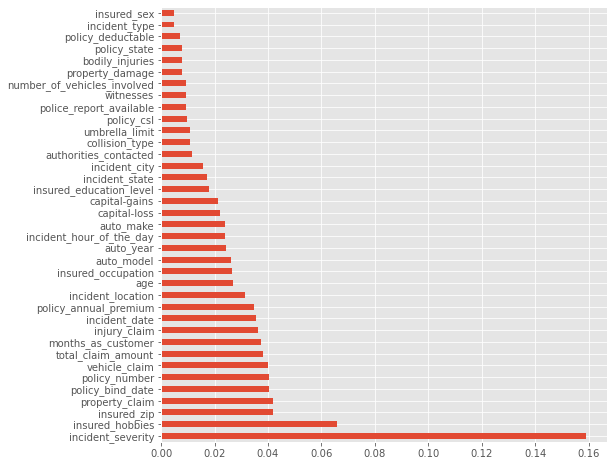

In [63]:
#Checking Feature Importance with XGB Model

feat_importances = pd.Series(rfc.feature_importances_, index=x.columns)
feat_importances.nlargest(100).plot(kind='barh',figsize=(8,8))

In [64]:
# load model and get predictions

model=joblib.load("Insurance_Fraud.pkl")

#Predict

prediction = model.predict(x_test)

prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [65]:
pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
Predicted,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
Original,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
